#**구글 마운트**

--------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Imports**

--------------------------------------

In [ ]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from string import ascii_lowercase
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier

#**데이터 파일**

--------------------------------------

In [ ]:
train  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/sw중심대학 공동 AI 경진대회/train.csv')
test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/sw중심대학 공동 AI 경진대회/test.csv')

#**EDA**

--------------------------------------

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 73 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            15000 non-null  float64
 1   Q2            15000 non-null  float64
 2   Q3            15000 non-null  float64
 3   Q4            15000 non-null  float64
 4   Q5            15000 non-null  float64
 5   Q6            15000 non-null  float64
 6   Q7            15000 non-null  float64
 7   Q8            15000 non-null  float64
 8   Q9            15000 non-null  float64
 9   Q10           15000 non-null  float64
 10  Q11           15000 non-null  float64
 11  Q12           15000 non-null  float64
 12  Q13           15000 non-null  float64
 13  Q14           15000 non-null  float64
 14  Q15           15000 non-null  float64
 15  Q16           15000 non-null  float64
 16  Q17           15000 non-null  float64
 17  Q18           15000 non-null  float64
 18  Q19           15000 non-nu

In [ ]:
train.loc[:,:'Q26'].isna().sum()

In [ ]:
train.loc[:,'country':].isna().sum()

In [ ]:
#총 결측값 수
train.isna().sum().sum()

3703

In [ ]:
columns = train.columns.tolist()
columns

In [ ]:
Answers = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5',
             'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 
             'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 
             'Q16', 'Q17', 'Q18', 'Q19', 'Q20',]

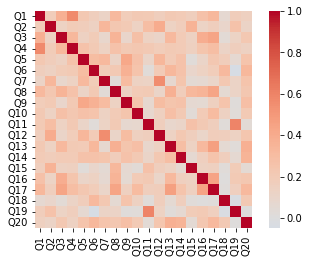

In [ ]:
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0) 

In [ ]:
eda_train = train.copy()

flipping_columns = ['Q3','Q7','Q10','Q16','Q4','Q11','Q17','Q9'] 
for flip in flipping_columns: 
    eda_train[flip] = 6 - eda_train[flip] 

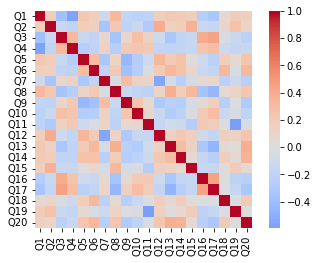

In [ ]:
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0) 

이미 리버스 질문들은 리버스 처리된 것으로 data 준 것으로 보임.



In [ ]:
#답변 개수? 확인
for i in column :
  value_counts = train[i].value_counts()
  print(value_counts)

0        1
10004    1
9992     1
9993     1
9994     1
        ..
5004     1
5005     1
5006     1
5007     1
14999    1
Name: index, Length: 15000, dtype: int64
5.0    5939
4.0    4924
3.0    2444
2.0    1055
1.0     597
Name: Q1, dtype: int64
5.0    7236
4.0    4129
3.0    1688
2.0    1067
1.0     811
Name: Q2, dtype: int64
5.0    7626
4.0    4788
3.0    1256
2.0     801
1.0     479
Name: Q3, dtype: int64
5.0    5512
4.0    4313
3.0    2564
2.0    1619
1.0     921
Name: Q4, dtype: int64
5.0    5619
4.0    4833
3.0    2153
2.0    1458
1.0     899
Name: Q5, dtype: int64
4.0    4846
5.0    4336
3.0    3238
2.0    1659
1.0     873
Name: Q6, dtype: int64
5.0    7584
4.0    4385
3.0    1581
2.0     854
1.0     520
Name: Q7, dtype: int64
5.0    6605
4.0    3888
3.0    1823
1.0    1319
2.0    1317
Name: Q8, dtype: int64
5.0    5627
4.0    4892
3.0    2620
2.0    1144
1.0     661
Name: Q9, dtype: int64
5.0    6983
4.0    4265
3.0    2501
2.0     706
1.0     473
Name: Q10, dtype: int64
5.0    

In [ ]:
value_counts = train['age'].value_counts()
value_counts.tail(60)

30       236
29       233
32       186
31       177
33       161
34       153
35       142
36       141
37       121
40       110
38       101
45        99
42        96
44        83
41        80
43        77
39        75
47        75
50        73
48        69
46        69
49        64
51        58
55        57
54        47
60        46
52        45
58        43
53        37
56        33
59        33
57        33
64        29
62        22
65        21
61        20
63        19
67        15
68        12
66        10
69         8
72         6
71         5
75         3
74         3
78         3
73         3
123        2
76         2
70         2
545        1
88         1
722        1
38822      1
100        1
77         1
99         1
81         1
336        1
80         1
Name: age, dtype: int64

In [ ]:
#age 이상치 삭제
train= train[train['age']<200]

In [ ]:
train['age'].describe()

count    15000.000000
mean        26.740867
std        317.058436
min         13.000000
25%         17.000000
50%         20.000000
75%         27.000000
max      38822.000000
Name: age, dtype: float64

In [ ]:
train['familysize'].describe()

count    14681.000000
mean         2.744091
std         24.109344
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max       2919.000000
Name: familysize, dtype: float64

age, family size 전부 왼쪽으로 치우침

#**피처**
--------------------------------------

In [ ]:
dataset = [train, test]

## 피처 스케일링
log화
(안하는게 더 나은듯..)

In [ ]:
print('정규화 전의 age의 편향 : ',train['age'].skew())

for data in dataset :
  data['age'] = np.log1p(data['age'])
  data['familysize'] = np.log1p(data['familysize'])

print('정규화 후의 age의 편향 : ',train['age'].skew())

정규화 전의 age의 편향 :  1.9530604534085223
정규화 후의 age의 편향 :  1.0430762489239735


https://blog.naver.com/alswjd3970/222529825109

## 결측치 제거

In [ ]:
column = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5',
             'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 
             'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 
             'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
             'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
             'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4','TIPI5',
             'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
             'education', 'gender', 'engnat', 'hand', 'age', 'religion',
             'orientation', 'voted', 'married', 'familysize', 'ASD']

<평균>

In [ ]:
for i in column : #평균
  train[i] = train[i].fillna(train[train[i]>0][i].mean())
  test[i] = test[i].fillna(train[train[i]>0][i].mean())

<최빈값>

In [ ]:
for i in column : #최빈값
  train[i] = train[i].fillna(train[i].value_counts().index[0])
  test[i] = test[i].fillna(train[i].value_counts().index[0])

<평균 반올림>

In [ ]:
for i in column : #평균 반올림
  train[i] = train[i].fillna(int(train[train[i]>0][i].mean()+0.5))
  test[i] = test[i].fillna(int(train[train[i]>0][i].mean()+0.5))

In [ ]:
for col in train[Answers]:
    print(sorted(train[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


## TIPI 수정

In [ ]:
#TIPI피처 항목 나누기
for data in dataset:
  data['Ex'] = data['TIPI1']-data['TIPI6']
  data['Ag'] = data['TIPI7']-data['TIPI2']
  data['Con'] = data['TIPI3']-data['TIPI8']
  data['Es'] =data['TIPI9']-data['TIPI4']
  data['Op'] =data['TIPI5']-data['TIPI10']

In [ ]:
train.columns

In [ ]:
# TIPI1~TIPI10 제거.. 흠.. 안하는게 더 나은듯
for data in dataset:
  data.drop([('TIPI'+str(i)) for i in range(1,11)], axis=1, inplace = True)

In [ ]:
train.columns

## 마키아밸리 테스트 피처 수정

In [ ]:
#T/V/M 피처 생성
for data in dataset: 
  data['T'] = data['Q1']+data['Q2']+data['Q3']+data['Q7']+data['Q10']+data['Q12']+data['Q15']+data['Q16']
  data['V'] = data['Q4']+data['Q5']+data['Q8']+data['Q11']+data['Q13']+data['Q17']+data['Q20']
  data['M'] = data['Q9']+data['Q19']

In [ ]:
#total_score 피처 생성
for data in dataset:
  data['total_score_Ma'] = data[Answers].sum(axis=1)

흠...........

In [ ]:
# combinations 를 이용해 answers의 모든 조합(2개씩)을 구해 리스트로 저장
Ancoms = list(combinations(Answers, 2)) 
for data in dataset:
  for a,b in Ancoms:
    data['%s_dv_%s'%(a,b)] = data[a]/data[b] 

In [ ]:
#마키아밸리 테스트 질문 피처 제거..음..안하는게 더 나을듯
for data in dataset:
  data.drop([('Q'+str(i)) for i in range(1,21)], axis = 1, inplace = True) 

## VCL


In [ ]:
#total_score 피처 생성
vcls = [('VCL'+str(i)) for i in range(1,17)]
for data in dataset:
  data['total_score_VCL'] = data[vcls].sum(axis=1)

In [ ]:
#vcl 제거.. 음.. 안하는게 더 나은듯
for data in dataset:
  data.drop(vcls, axis=1, inplace = True)

## 딜레이 시간

0    562
1    210
2    217
3    262
4    859
Name: delay, dtype: int64

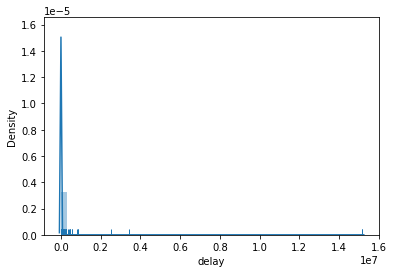

In [ ]:
# 'introelapse','testelapse','surveyelapse' 피처 delay로 합치기
times = ['introelapse','testelapse','surveyelapse']

for data in dataset:
  data['delay'] = data[times].sum(axis=1)

sns.distplot(train['delay'], rug = True)
train['delay'].head()

In [ ]:
# 'introelapse','testelapse','surveyelapse' 피처 제거
for data in dataset:
  data.drop(times, axis=1, inplace = True)

## 필요 없는 피처 제거

In [ ]:
#delete = ['VCL16', 'VCL4','ASD']

delete = ['VCL16','VCL4','VCL1']
for data in dataset:
  data.drop(delete, axis=1, inplace = True)

#**모델링**

--------------------------------------

In [ ]:
index = test["index"]
train = train.drop(['index', 'country'],axis = 1) 
test =test.drop(['index', 'country'],axis = 1)

In [ ]:
#train을 target과 feature로 나눠줍니다.
train_x=train.drop(['nerdiness'], axis=1)
train_y=train['nerdiness']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size=0.3, random_state = 0)

##LGBM

In [ ]:
lgbm_clf = LGBMClassifier(
            n_estimators=6000,
            num_leaves = 60,
            max_depth = -1,
            sub_sample = 0.8,
            feature_fraction = 0.8

        )

lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)
y_pred_probability = lgbm_clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %f"%roc_auc)
#<결측치 처리>
#AUC : 0.863746 (반올림)
#AUC : 0.863746 (최빈값)
#AUC : 0.866443 (평균)
#AUC : 0.865755 (평균기본+TIPI+TVM+제거)
#AUC : 0.864444 (최빈값기본+TIPI+TVM+제거)
#AUC : 0.863135 (반올림기본+TIPI+TVM+제거)

#AUC : 0.859887
#AUC : 0.859139 (label encoder)
#AUC : 0.861150 (결측치 제거 평균)
#AUC : 0.862698 (tipi 바꾼거)
#AUC : 0.865166 (delay 추가)
#AUC : 0.865166 (피처제거)
#AUC : 0.860515 (마키아)
#AUC : 0.862900 (콤비)

#<결측치만 처리>
#AUC : 0.866428 (아무것도 안함)
#AUC : 0.865320 (tipi 추가)
#AUC : 0.866425 (TVM 추가)
#AUC : 0.866433 (마키 토탈 추가)
#AUC : 0.866424 (VCL 토탈 추가)
#AUC : 0.862727 (delay 추가제거)
#AUC : 0.866443 (콤비 추가)
#AUC : 0.864507 (TIPI 추가제거)
#AUC : 0.866439 (TVM 추가제거)
#AUC : 0.862920 (콤비 추가제거)
#AUC : 0.866423 (제거)
#AUC : 0.854167 (피처스케일링)
#AUC : 0.854167 (이상치제거)

#<1000>
#AUC : 0.859937 (기본: 결측치 제거, delay 피처 형성)
#AUC : 0.863578 (기본+TIPI)
#AUC : 0.860644 (기본+마키TVM)
#AUC : 0.857644 (기본+마키total)
#AUC : 0.859750 (기본+VCL_total)
#AUC : 0.859750 (전부)
#AUC : 0.862681 (기본+TIPI+TVM)
#AUC : 0.862184 (기본+TIPI+TVM+제거)

#AUC : 0.866890 (결측치 처리+TIPI+제거)
#AUC : 0.868443 (결측치 처리+TIPI+TVM+제거)
#AUC : 0.858229 (결측+피처스케일링+TIPI+TVM+제거)
#AUC : 0.854167 (결측+이상치제거+TIPI+TVM)

#0.869530

AUC : 0.854167


<BarContainer object of 74 artists>

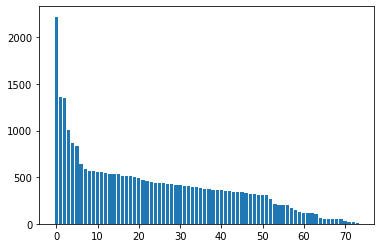

In [ ]:
importances = lgbm_clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]),importances[indices])

In [ ]:
feat_labels = X_train.columns.tolist()
feature = list(zip(feat_labels, importances))
sorted(feature, key=lambda tup: tup[1], reverse=False)[:10]

[('VCL1', 13),
 ('VCL10', 20),
 ('VCL4', 23),
 ('VCL15', 26),
 ('VCL14', 50),
 ('ASD', 50),
 ('VCL2', 51),
 ('VCL5', 53),
 ('VCL6', 54),
 ('VCL9', 64)]

##RandomForest

In [ ]:
forest = RandomForestClassifier(n_estimators = 6000,
                                bootstrap = True,
                                min_samples_split=3,
                                n_jobs = -1,
                                )
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_pred_probability = forest.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %f"%roc_auc)
#<결측치 처리>
#AUC : 0.875760 (반올림)
#AUC : 0.875484 (최빈값)
#AUC : 0.876095 (평균)
#AUC : 0.874309 (평균기본+TIPI+TVM+제거)
#AUC : 0.874715 (최빈값기본+TIPI+TVM+제거)
#AUC : 0.873959 (반올림기본+TIPI+TVM+제거)

#10000
#AUC : 0.876445
#7000
#AUC : 0.876573
#6000
#AUC : 0.876725
#5000
#AUC : 0.876000
#3000
#AUC : 0.875796

#<결측치만 처리>
#AUC : 0.876835 (아무것도 안함)
#AUC : 0.876478 (tipi 추가)
#AUC : 0.876623 (TVM 추가)
#AUC : 0.876521 (마키 토탈 추가)
#AUC : 0.876653 (VCL 토탈 추가)
#AUC : 0.876207 (delay 추가제거)
#AUC : 0.876703 (콤비 추가)
#AUC : 0.875834 (TIPI 추가제거)
#AUC : 0.876329 (TVM 추가제거)
#AUC : 0.862666 (콤비 추가제거)
#AUC : 0.876161 (제거)
#AUC : 0.862516 (피처스케일링)
#AUC : 0.862576 (이상치제거)

#<1000>
#AUC : 0.874977 (기본: 결측치 제거, delay 피처 형성)
#AUC : 0.876076 (기본+TIPI)
#AUC : 0.874227 (기본+마키TVM)
#AUC : 0.875724 (기본+마키total)
#AUC : 0.875586 (기본+VCL_total)
#AUC : 0.874589 (기본+TIPI+TVM)
#AUC : 0.875103 (기본+TIPI+TVM+제거)

#AUC : 0.876620 (결측치 처리+TIPI+제거)
#AUC : 0.874668 (결측치 처리+TIPI+TVM+제거)
#AUC : 0.863136 (결측+피처스케일링+TIPI+TVM+제거)
#AUC : 0.862451 (결측+이상치제거+TIPI+TVM)

AUC : 0.862576


<BarContainer object of 67 artists>

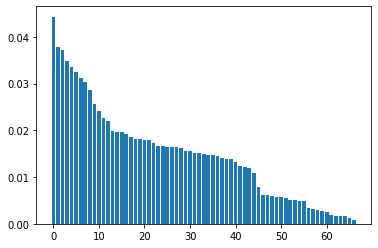

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]),importances[indices])

In [ ]:
feat_labels = X_train.columns.tolist()
feature = list(zip(feat_labels, importances*10000))
sorted(feature, key=lambda tup: tup[1], reverse=False)[:10]

[('VCL4', 11.008680650123582),
 ('VCL15', 13.146798780372569),
 ('VCL1', 13.389197858048515),
 ('VCL10', 14.216075160759209),
 ('VCL5', 15.391702668410817),
 ('VCL2', 20.563647917690048),
 ('VCL14', 23.811217110132368),
 ('VCL9', 25.8880952787887),
 ('ASD', 27.17019435185356),
 ('VCL6', 27.356722248280153)]

##XGBoost

In [ ]:
import xgboost as xgb
boost = xgb.XGBClassifier(n_estimators = 6000, tree_method='gpu_hist', gpu_id=0)
boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)
y_pred_probability = boost.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %f"%roc_auc)
#<결측치 처리>
#AUC : 0.829573 (반올림)
#AUC : 0.829573 (최빈값)
#AUC : 0.829788 (평균)
#AUC : 0.828911 (평균기본+TIPI+TVM+제거)
#AUC : 0.829636 (최빈값기본+TIPI+TVM+제거)
#AUC : 0.827244 (반올림기본+TIPI+TVM+제거)

#<결측치만 처리>
#AUC : 0.829788 (아무것도 안함)
#AUC : 0.832714 (tipi 추가)
#AUC : 0.829788 (TVM 추가)
#AUC : 0.829788 (마키 토탈 추가)
#AUC : 0.829788 (VCL 토탈 추가)
#AUC : 0.827867 (delay 추가제거)
#AUC : 0.829788 (콤비 추가)
#AUC : 0.832097 (TIPI 추가제거)
#AUC : 0.829788 (TVM 추가제거)
#AUC : 0.833398 (콤비 추가제거)
#AUC : 0.829788 (제거)
#AUC : 0.821471 (피처스케일링)
#AUC : 0.821471 (이상치제거)

#<1000>
#AUC : 0.821546 (기본: 결측치 제거, delay 피처 형성)
#AUC : 0.825478 (기본+TIPI)
#AUC : 0.826169 (기본+마키TVM)
#AUC : 0.823566 (기본+마키total)
#AUC : 0.821455 (기본+VCL_total)
#AUC : 0.823301 (전부)
#AUC : 0.825130 (기본+TIPI+TVM)
#AUC : 0.826255 (기본+TIPI+TVM+제거)

#AUC : 0.833440 (결측치 처리+TIPI+제거)
#AUC : 0.836130 (결측치 처리+TIPI+TVM+제거)
#AUC : 0.824636 (결측+피처스케일링+TIPI+TVM+제거)
#AUC : 0.821471 (결측+이상치제거+TIPI+TVM)

AUC : 0.821471


<BarContainer object of 74 artists>

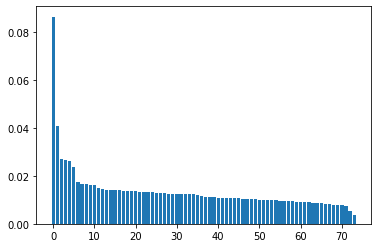

In [ ]:
importances = boost.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]),importances[indices])

In [ ]:
feat_labels = X_train.columns.tolist()
feature = list(zip(feat_labels, importances*10000))
sorted(feature, key=lambda tup: tup[1], reverse=False)[:]

[('VCL8', 36.229942),
 ('VCL13', 53.655243),
 ('age', 72.0619),
 ('M', 77.12401),
 ('Q7', 77.69887),
 ('delay', 78.09222),
 ('married', 81.92201),
 ('TIPI6', 83.617455),
 ('Q21', 86.35066),
 ('Es', 86.45483),
 ('VCL6', 88.56853),
 ('total_score_VCL', 89.39036),
 ('VCL10', 89.856),
 ('Q13', 92.05478),
 ('V', 92.38814),
 ('TIPI4', 92.998436),
 ('Q9', 93.8315),
 ('TIPI3', 93.946045),
 ('hand', 95.451355),
 ('Op', 97.61373),
 ('VCL2', 98.032906),
 ('religion', 98.58044),
 ('Q22', 99.254715),
 ('VCL4', 99.97195),
 ('TIPI10', 101.89923),
 ('familysize', 103.62283),
 ('TIPI2', 104.48477),
 ('Ag', 105.23084),
 ('Q20', 105.98684),
 ('Q23', 106.32815),
 ('VCL15', 106.54681),
 ('education', 108.97275),
 ('Q10', 109.12897),
 ('Q12', 109.29721),
 ('Con', 109.728325),
 ('TIPI9', 110.49341),
 ('Q8', 113.02222),
 ('voted', 116.15289),
 ('Ex', 121.93505),
 ('VCL14', 122.783844),
 ('VCL12', 122.934784),
 ('TIPI8', 123.81244),
 ('Q24', 123.94092),
 ('TIPI5', 123.97491),
 ('Q3', 124.54312),
 ('gender', 12

## BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators = 1000)
bagging.fit(X_train,y_train)
y_pred = bagging.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
print("AUC : %f"%roc_auc)   
#AUC : 0.746547 (tipi 바꾼거)
#AUC : 0.781357 (delay 추가)
#AUC : 0.783714 (피처제거)

AUC : 0.775658


## Multi Layer Perceptron Classifier(MLP Classifier)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
print("AUC : %f"%roc_auc)  
#AUC : 0.642422 (tipi 바꾼거)
#AUC : 0.558301 (delay 추가)
#AUC : 0.584082 (피처 제거)

AUC : 0.652624


## Feature Selection model (Random Forest)

모델1

In [ ]:
def randomForest_rfe_4040(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = RandomForestClassifier(n_estimators = 6000,
                                bootstrap = True,
                                min_samples_split=3,
                                n_jobs = -1,
                                )
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=4040)
        model.fit(x_train, y_train)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)        
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [ ]:
randomForest_archive_4040 = randomForest_rfe_4040(train_x, train_y)

75 0.8607928818580561
67 0.8605057624137743
60 0.8603700541766875
54 0.8601304758345696
48 0.8600910023133789
43 0.8597783835506634


In [ ]:
randomForest_archive_4040.head()

,model,n_feats,feats,score
0,"(DecisionTreeClassifier(max_features='auto', m...",75,"[Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10, Q11,...",0.860793
1,"(DecisionTreeClassifier(max_features='auto', m...",67,"[total_score_Ma, T, V, Q6, delay, age, Q15, Q1...",0.860506
2,"(DecisionTreeClassifier(max_features='auto', m...",60,"[total_score_Ma, T, V, Q6, delay, age, Q15, Q1...",0.860370
3,"(DecisionTreeClassifier(max_features='auto', m...",54,"[total_score_Ma, T, V, Q6, delay, age, Q15, Q1...",0.860130
4,"(DecisionTreeClassifier(max_features='auto', m...",48,"[total_score_Ma, T, V, Q6, delay, age, Q15, Q1...",0.860091


In [ ]:
model = RandomForestClassifier(n_estimators = 6000,
                                bootstrap = True,
                                min_samples_split=3,
                                n_jobs = -1,
                                )

x_train_1 = train_x[randomForest_archive_4040.iloc[7,2]]

model.fit(x_train_1, y_train)

pred_y1 = model.predict_proba(test[randomForest_archive_4040.iloc[7,2]])
pred_y1 = pred_y1[:,1]

IndexError: ignored

모델2

In [ ]:
def randomForest_rfe_1234(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = RandomForestClassifier(n_estimators = 6000,
                                bootstrap = True,
                                min_samples_split=3,
                                n_jobs = -1,
                                )
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=1234)
        model.fit(x_train, y_train)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [ ]:
randomForest_archive_1234 = randomForest_rfe_1234(train_x, train_y)

75 0.8550959933989455
67 0.8551609236879485
60 0.8554614417512102
54 0.8552907842659544
48 0.8556160103152968
43 0.8545864630115703


In [ ]:
model2 = RandomForestClassifier(n_estimators = 6000,
                                bootstrap = True,
                                min_samples_split=3,
                                n_jobs = -1,
                                )

x_train_2 = train_x[randomForest_archive_1234.iloc[14,2]]

model2.fit(x_train_2, y_train)

pred_y2 = model2.predict_proba(test[randomForest_archive_1234.iloc[14,2]])
pred_y2 = pred_y2[:,1]

모델3

In [ ]:
def lgbm_rfe_99087(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = RandomForestClassifier(n_estimators = 6000,
                                bootstrap = True,
                                min_samples_split=3,
                                n_jobs = -1,
                                )
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=99087)
        model.fit(x_train, y_train)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [ ]:
randomForest_archive_99087 = lgbm_rfe_99087(train_x, train_y)

75 0.862806378608868
67 0.8628477772385734
60 0.8629669420442183


In [ ]:
model3 = RandomForestClassifier(n_estimators = 6000,
                                bootstrap = True,
                                min_samples_split=3,
                                n_jobs = -1,
                                )

x_train_3 = train_x[randomForest_archive_99087.iloc[7,2]]

model3.fit(x_train_3, y_train)

pred_y3 = model3.predict_proba(test[randomForest_archive_99087.iloc[7,2]])
pred_y3 = pred_y3[:,1]

모델4

In [ ]:
def lgbm_rfe_42(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = RandomForestClassifier(n_estimators = 6000,
                                bootstrap = True,
                                min_samples_split=3,
                                n_jobs = -1,
                                )
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=42)
        model.fit(x_train, y_train)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [ ]:
randomForest_archive_42 = lgbm_rfe_42(train_x, train_y)

In [ ]:
model4 = RandomForestClassifier(n_estimators = 6000,
                                bootstrap = True,
                                min_samples_split=3,
                                n_jobs = -1,
                                )

x_train_4 = train_x[randomForest_archive_42.iloc[8,2]]

model4.fit(x_train_4, y_train)

pred_y4 = model4.predict_proba(test[randomForest_archive_42.iloc[8,2]])
pred_y4 = pred_y4[:,1]

앙상블

In [ ]:
pred_all = (pred_y + pred_y2 + pred_y3 + pred_y4) * (1/4)

'''
submission = pd.DataFrame({
    "index" : index,
    "voted" : pred_all
})
submission.to_csv('../data/model2.csv', index=False)
'''

## 앙상블

In [ ]:
from sklearn.ensemble import VotingClassifier

soft_vote  = VotingClassifier([('r1',lgbm_clf), ('r2', forest), ('r3',boost)], voting='soft') 
soft_vote.fit(X_train, y_train)
y_pred = soft_vote.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
print("AUC : %f"%roc_auc)  
#AUC : 0.781074 (TIPI 추가)
#AUC : 0.786531 (delay 추가)
#AUC : 0.787359 (피처 제거)

# **평가**

--------------------------------------

## AUC Score

In [ ]:
def see_auc(y_test, y_pred) :
  roc_auc = roc_auc_score(y_test, y_pred)
  print("AUC : %f"%roc_auc)
  return

## RUC 곡선

In [ ]:
plt.rcParams['figure.figsize'] = [5,4]
plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curve (area = %f)'%roc_auc, color='red', linewidth=4.0)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

#**제출 파일**

--------------------------------------

In [ ]:
lgbm_clf = LGBMClassifier(
            n_estimators=6000,
            num_leaves = 60,
            max_depth = -1,
            sub_sample = 0.8,
            feature_fraction = 0.8
        )

lgbm_clf.fit(train_x, train_y)

lgbm_pred = lgbm_clf.predict(test)

In [ ]:
submission = pd.DataFrame({
    "index" : index,
    "nerdiness" : lgbm_pred
})

submission.to_csv('/content/drive/MyDrive/Colab Notebooks/data/sw중심대학 공동 AI 경진대회/lgbm_결측_TIPI_TVM_제거.csv', index=False)

In [ ]:
forest = forest = RandomForestClassifier(n_estimators = 6000,
                                bootstrap = True,
                                min_samples_split=3,
                                n_jobs = -1,
                                )
forest.fit(train_x, train_y)

forest_pred = forest.predict(test)

In [ ]:
submission = pd.DataFrame({
    "index" : index,
    "nerdiness" : forest_pred
})

submission.to_csv('/content/drive/MyDrive/Colab Notebooks/data/sw중심대학 공동 AI 경진대회/randomforest_결측.csv', index=False)

In [ ]:
boost = RandomForestClassifier(n_estimators = 6000)
boost.fit(train_x, train_y)

boost_pred = boost.predict(test)

In [ ]:
submission = pd.DataFrame({
    "index" : index,
    "nerdiness" : boost_pred
})

submission.to_csv('/content/drive/MyDrive/Colab Notebooks/data/sw중심대학 공동 AI 경진대회/xgboost_기본_TIPI_TVM_제거.csv', index=False)

#기타

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7646542101209689482
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16139419648
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4268109413493874620
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]